### Importing libraries

In [3]:
%pip install seaborn

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


### Loading the dataset

In [99]:
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


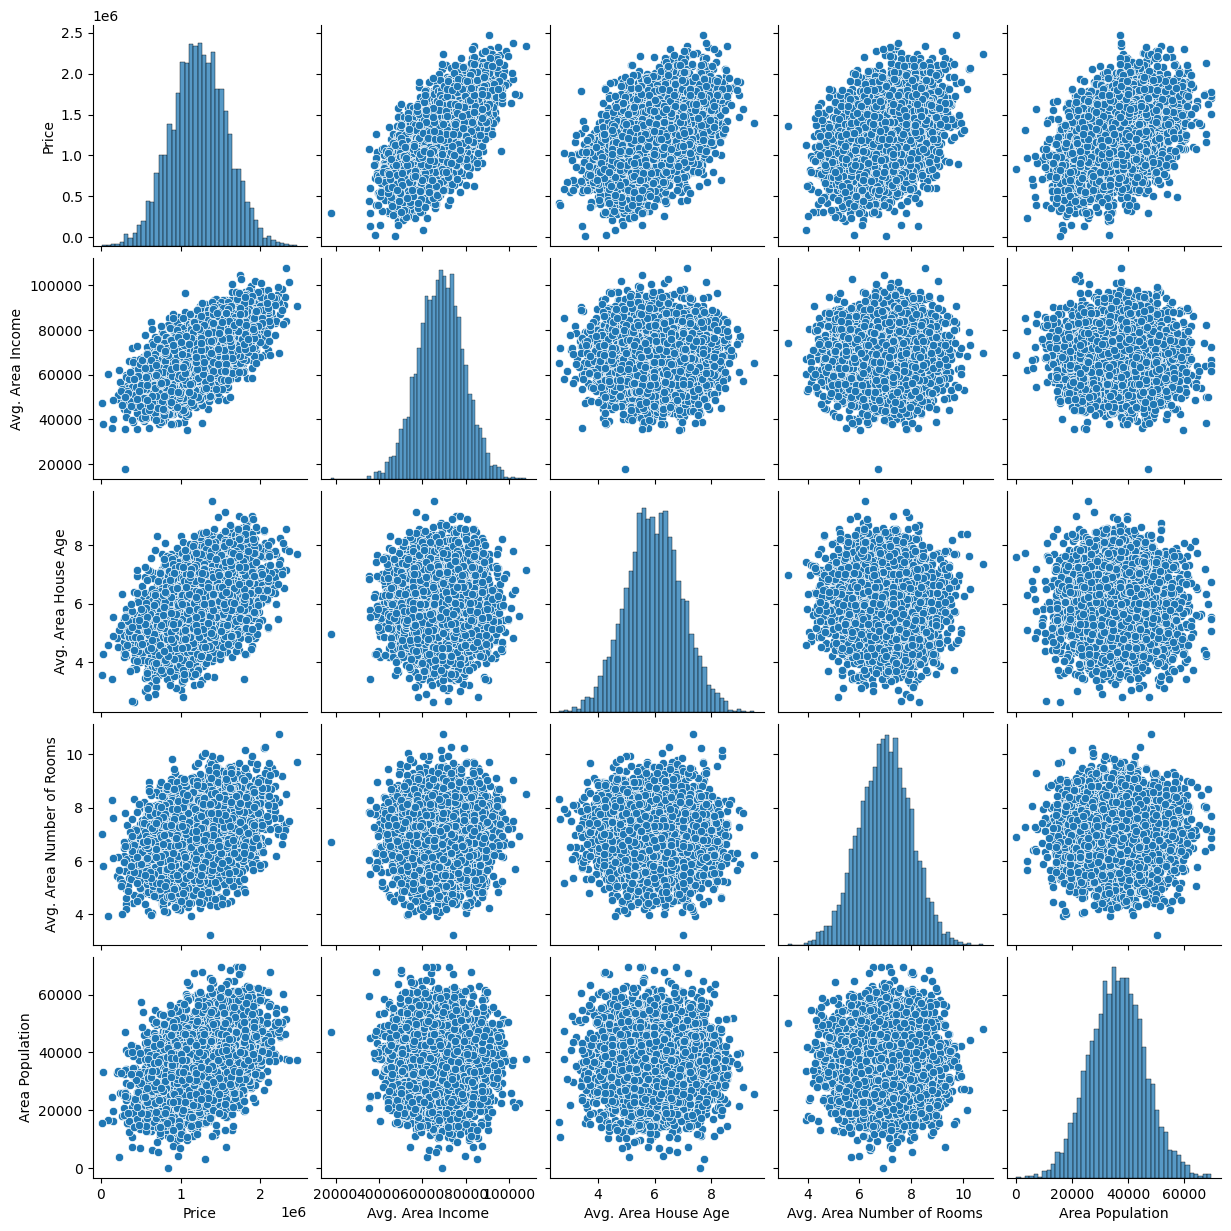

In [100]:
sns.pairplot(data[['Price', 'Avg. Area Income', 'Avg. Area House Age', 
                   'Avg. Area Number of Rooms', 'Area Population']])
plt.show()


In [101]:
data = data.drop(['Address'], axis=1)

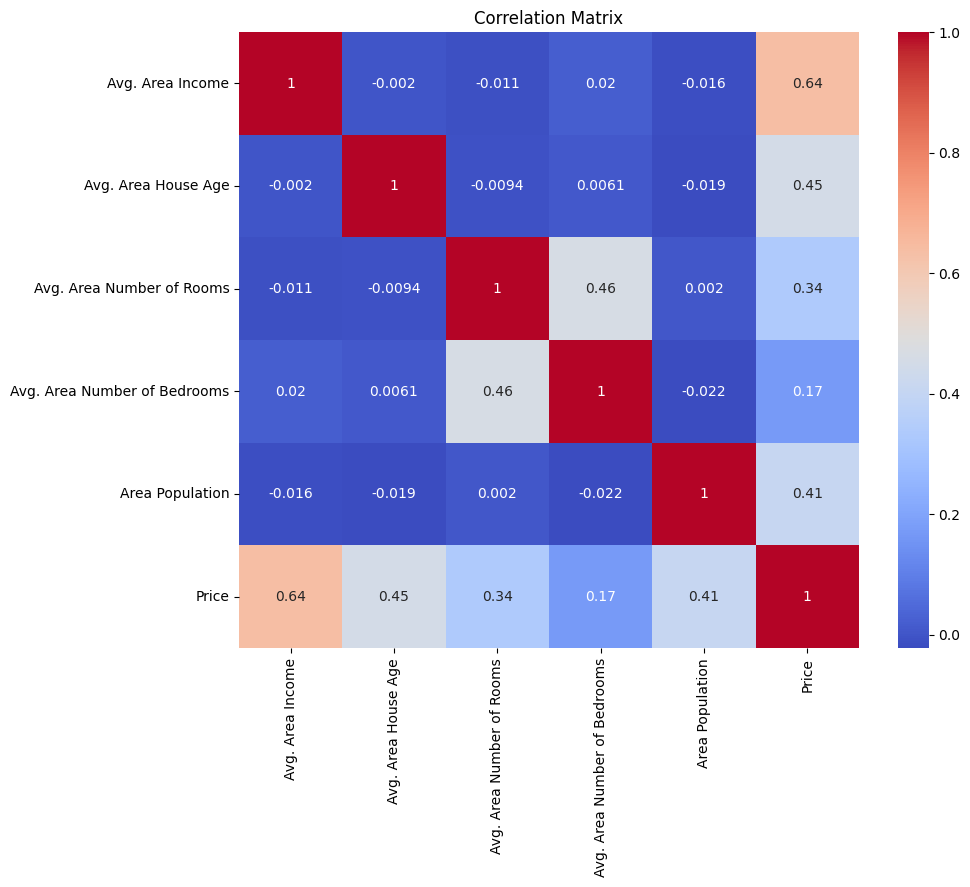

In [102]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Check for missing data

<Axes: >

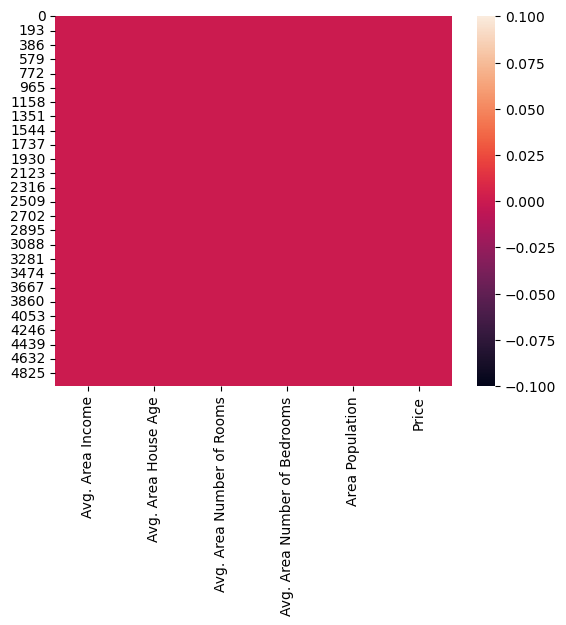

In [103]:
sns.heatmap(data.isnull())

### Train test split

In [104]:
X = data.drop('Price', axis=1)
X = data[['Avg. Area Income', 'Avg. Area House Age', 
          'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
          'Area Population']]

y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and prediction

In [105]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

### Evaluation

In [107]:
error = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))

In [108]:
error

np.float64(284.3925055884378)

### Accuracy (R^2 Score)

In [110]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')


R^2 Score: 0.9180


### Plot of predicted vs actual values

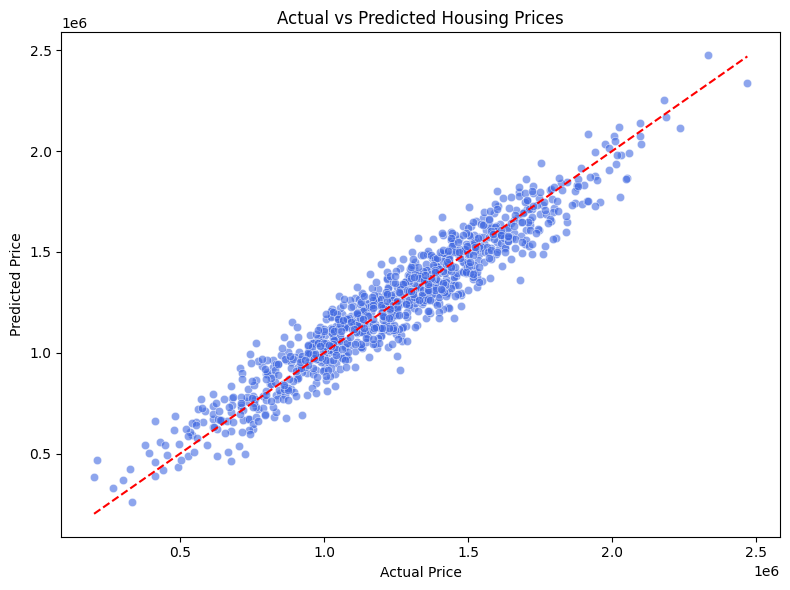

In [111]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.tight_layout()
plt.show()